In [2]:
import pyreadstat
# Auto-reload modules when they change
%load_ext autoreload
%autoreload 2


from visuals import * 
df, meta = pyreadstat.read_dta('../data/GenZ_Gallup.dta')

# Gallup World Poll Dataset Analysis

In [3]:
binary_vars = {
    'WP97': 'Health',
    'WP93': 'Education', 
    'WP131': 'Welfare',
    'WP30': 'StandardOfLiving',
    'WP128': 'Opportunity',
    'WP146': 'Corruption',
    'WP150': 'ApprovalLeader',
    'WP139': 'TrustGovernment',
    'WP138': 'TrustCourts',
    'WP112': 'TrustPolice',
    'WP137': 'TrustMilitary',
    'WP143': 'TrustMedia',
    'WP144': 'TrustElections',
    'WP16':'SubjectiveWellBeing'
}

index_vars = {
    'INDEX_FS': 'FoodShelter',
    'INDEX_DI': 'Diversity', 
    'INDEX_CE': 'InterpersonalTrust'
}

demographics = {
    'WP1220' : 'Age',
    'WP1219' : 'Gender',
    'WP14': 'Residence',
    'WP9811':'Education_Level_2',
      'WP3117':'Education_Level'
}

In [4]:
df.rename(columns=index_vars, inplace=True)
df.rename(columns=binary_vars, inplace=True)
df.rename(columns = demographics, inplace=True)

In [5]:
columns_of_interest = ['InterpersonalTrust', 'Diversity',
       'FoodShelter',  'TrustPolice', 
       'Opportunity', 'Welfare', 'TrustMilitary', 'TrustCourts',
       'TrustGovernment','TrustElections', 'Corruption',
       'ApprovalLeader', 'StandardOfLiving',  'Education',
       'Health','SubjectiveWellBeing' ]

len(columns_of_interest)

16

In [6]:
# Replace Education_Level (WP3117) values with meaningful labels
# 1 = No formal education
# 2 = 1-8 years education
# 3 = 9 years through completed secondary
# 4 = 1-3 years tertiary
# 5 = Completed 4+ years tertiary (bachelor's or higher)
# 98 = Don't Know (DK)
# 99 = Refused (RF)

education_mapping = {
    1: 'No Formal Education',
    2: 'Primary Education',
    3: 'Secondary Education',
    4: '1-3 Years Tertiary',
    5: 'Bachelor or Higher',
    98: 'Don\'t Know',
    99: 'Refused'
}

# Apply the mapping
df['Education_Level_Label'] = df['Education_Level_2'].map(education_mapping)


In [7]:
# Replace Education_Level (WP3117) values with meaningful labels
# 3-category education system
# 1 = Elementary or less (up to 8 years)
# 2 = Secondary and some tertiary (9-15 years)
# 3 = 4-year college degree or higher
# 98 = Don't Know (DK)
# 99 = Refused (RF)

education_level_mapping = {
    1: 'Elementary or Less',
    2: 'Secondary/Some Tertiary',
    3: 'College Degree or Higher',
    98: 'Donot Know',
    99: 'Refused'
}

# Apply the mapping to Education_Level (WP3117)
df['Education_Level_Label_3Cat'] = df['Education_Level'].map(education_level_mapping)


In [8]:
# Replace Residence (WP14) values with meaningful labels
# 1 = Rural area or farm
# 2 = Small town or village
# 3 = Large city
# 4 = Suburb of a large city
# 98 = Don't Know (DK)
# 99 = Refused (RF)

residence_mapping = {
    1: 'Rural/Farm',
    2: 'Small Town/Village',
    3: 'Large City',
    4: 'Donot Know',
    5: 'Refused',
    6: 'Suburb',
}

# Apply the mapping to Residence (WP14)
df['Residence_Label'] = df['Residence'].map(residence_mapping)

# Check the results
print("Residence Distribution:")
print(df['Residence_Label'].value_counts(dropna=False).sort_index())
print(f"\nOriginal column: Residence (WP14)")
print(f"New labeled column: Residence_Label")

Residence Distribution:
Residence_Label
Donot Know             1008
Large City            52132
Refused                  26
Rural/Farm            20375
Small Town/Village    24673
Suburb                16579
Name: count, dtype: int64

Original column: Residence (WP14)
New labeled column: Residence_Label


In [9]:
# Create Age Groups (buckets) from Age (WP1220)
# Replicating Stata code:
# replace WP1220=15 if WP1220>=15 & WP1220<=30
# replace WP1220=31 if WP1220>=31 & WP1220<=45
# replace WP1220=46 if WP1220>=46 & WP1220<=60
# replace WP1220=61 if WP1220>=61 & WP1220<100 (100 is refused)

import numpy as np

# Create age group variable
df['Age_Group'] = np.nan

# Apply age bucketing
df.loc[(df['Age'] >= 0) & (df['Age'] < 15), 'Age_Group'] = 0
df.loc[(df['Age'] >= 15) & (df['Age'] <= 30), 'Age_Group'] = 15
df.loc[(df['Age'] >= 31) & (df['Age'] <= 45), 'Age_Group'] = 31
df.loc[(df['Age'] >= 46) & (df['Age'] <= 60), 'Age_Group'] = 46
df.loc[(df['Age'] >= 61) & (df['Age'] < 100), 'Age_Group'] = 61
# Age >= 100 stays as NaN (refused)

# Create readable labels
age_group_labels = {
    0: '0-14',
    15: '15-30',
    31: '31-45',
    46: '46-60',
    61: '61+'
}

df['Age_Group_Label'] = df['Age_Group'].map(age_group_labels)

# Check the results
print("Age Group Distribution:")
print(df['Age_Group_Label'].value_counts(dropna=False).sort_index())
print(f"\nOriginal column: Age (WP1220)")
print(f"New columns: Age_Group (numeric) and Age_Group_Label (text)")

Age Group Distribution:
Age_Group_Label
15-30    48589
31-45    39195
46-60    19327
61+       7524
NaN        158
Name: count, dtype: int64

Original column: Age (WP1220)
New columns: Age_Group (numeric) and Age_Group_Label (text)


In [10]:
# Replace Education_Level (WP3117) values with meaningful labels
# 3-category education system
# 1 = Elementary or less (up to 8 years)
# 2 = Secondary and some tertiary (9-15 years)
# 3 = 4-year college degree or higher
# 98 = Don't Know (DK)
# 99 = Refused (RF)

mapping = {
    1: 'Male',
    2:'Female'
}

# Apply the mapping to Education_Level (WP3117)
df['Gender_Label'] = df['Gender'].map(mapping)


In [11]:
# Replace INCOME_5 values with meaningful labels
# Income quintiles (5 groups of 20% each)
# 1 = Poorest 20%
# 2 = Second 20%
# 3 = Middle 20%
# 4 = Fourth 20%
# 5 = Richest 20%

income_mapping = {
    1: 'Poorest 20%',
    2: 'Second 20%',
    3: 'Middle 20%',
    4: 'Fourth 20%',
    5: 'Richest 20%'
}

# Apply the mapping to INCOME_5
df['Income_Label'] = df['INCOME_5'].map(income_mapping)

# Check the results
print("Income Quintile Distribution:")
print(df['Income_Label'].value_counts(dropna=False).sort_index())
print(f"\nOriginal column: INCOME_5")
print(f"New labeled column: Income_Label")

Income Quintile Distribution:
Income_Label
Fourth 20%     24273
Middle 20%     22210
Poorest 20%    19066
Richest 20%    28691
Second 20%     20553
Name: count, dtype: int64

Original column: INCOME_5
New labeled column: Income_Label


## Data Cleaning - Replicating Stata .do File

Now we'll clean all the indicator variables exactly as done in the Stata code:
- **Binary variables**: Recode 2→0 (No), set values >2 to NaN (missing)
- **Index variables**: Divide by 100 to scale to 0-1 range
- **Subjective Wellbeing**: Set values >10 to NaN, then divide by 10

In [12]:
# Clean Binary Variables (1=Yes, 2→0=No, >2→NaN)
# Replicates Stata: replace VAR=0 if VAR==2; replace VAR=. if VAR>2
import pandas as pd

binary_columns = [
    'Health', 'Education', 'Welfare', 'StandardOfLiving', 
    'Opportunity', 'Corruption', 'ApprovalLeader', 'TrustGovernment',
    'TrustCourts', 'TrustPolice', 'TrustMilitary', 'TrustMedia', 'TrustElections'
]

print("Cleaning Binary Variables:")
print("="*60)

for col in binary_columns:
    if col in df.columns:
        # Convert categorical to numeric if needed
        if isinstance(df[col].dtype, pd.CategoricalDtype):
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Recode: 2→0, >2→NaN
        df.loc[df[col] == 2, col] = 0
        df.loc[df[col] > 2, col] = np.nan
        
        # Count valid responses
        valid_count = df[col].notna().sum()
        mean_val = df[col].mean()
        print(f"  {col:20s}: {valid_count:6,} valid | mean={mean_val:.3f}")
    else:
        print(f"  {col:20s}: NOT FOUND")

print("\n✓ Binary variables cleaned (1=Yes, 0=No)")

Cleaning Binary Variables:
  Health              : 113,109 valid | mean=0.533
  Education           : 106,124 valid | mean=0.552
  Welfare             : 107,332 valid | mean=0.509
  StandardOfLiving    : 112,850 valid | mean=0.666
  Opportunity         : 50,866 valid | mean=0.848
  Corruption          : 45,732 valid | mean=0.853
  ApprovalLeader      : 43,317 valid | mean=0.391
  TrustGovernment     : 45,610 valid | mean=0.416
  TrustCourts         : 54,843 valid | mean=0.465
  TrustPolice         : 50,803 valid | mean=0.621
  TrustMilitary       : 38,822 valid | mean=0.815
  TrustMedia          :      0 valid | mean=nan
  TrustElections      : 46,362 valid | mean=0.358

✓ Binary variables cleaned (1=Yes, 0=No)


In [13]:
education = df[(df['countrynew']=='Lebanon')&(df['YEAR_WAVE']>=2017)&(df['YEAR_WAVE']<=2019)][['Gender_Label', 'Education', 'wgt']]
education['Education_wgt'] = education['Education'] * education['wgt']
education_summary = education.groupby('Gender_Label').agg({'Education_wgt':'mean', 'Education':'mean', 'wgt':'mean'}).reset_index()
education_summary

,Gender_Label,Education_wgt,Education,wgt
0,Female,0.63528,0.638794,1.006994
1,Male,0.584483,0.587193,0.993016


In [14]:
# Clean Index Variables (divide by 100 to scale to 0-1)
# Replicates Stata: replace INDEX_XX=INDEX_XX/100

index_columns = ['FoodShelter', 'Diversity', 'InterpersonalTrust']

print("\nCleaning Index Variables:")
print("="*60)

for col in index_columns:
    if col in df.columns:
        # Convert categorical to numeric if needed
        if isinstance(df[col].dtype, pd.CategoricalDtype):
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Divide by 100 to scale to 0-1 range
        df[col] = df[col] / 100
        
        valid_count = df[col].notna().sum()
        mean_val = df[col].mean()
        print(f"  {col:20s}: {valid_count:6,} valid | mean={mean_val:.3f}")
    else:
        print(f"  {col:20s}: NOT FOUND")

print("\n✓ Index variables scaled to 0-1 range")


Cleaning Index Variables:
  FoodShelter         : 112,724 valid | mean=0.689
  Diversity           : 19,712 valid | mean=0.426
  InterpersonalTrust  : 113,792 valid | mean=0.336

✓ Index variables scaled to 0-1 range


In [15]:
# Clean Subjective Wellbeing (WP16)
# Replicates Stata: replace WP16=. if WP16>10; replace WP16=WP16/10

print("\nCleaning Subjective Wellbeing:")
print("="*60)

if 'SubjectiveWellBeing' in df.columns:
    # Convert categorical to numeric if needed
    if isinstance(df['SubjectiveWellBeing'].dtype, pd.CategoricalDtype):
        df['SubjectiveWellBeing'] = pd.to_numeric(df['SubjectiveWellBeing'], errors='coerce')
    
    # Set values >10 to NaN (invalid responses)
    df.loc[df['SubjectiveWellBeing'] > 10, 'SubjectiveWellBeing'] = np.nan
    
    # Divide by 10 to scale to 0-1 range
    df['SubjectiveWellBeing'] = df['SubjectiveWellBeing'] / 10
    
    valid_count = df['SubjectiveWellBeing'].notna().sum()
    mean_val = df['SubjectiveWellBeing'].mean()
    print(f"  SubjectiveWellBeing: {valid_count:6,} valid | mean={mean_val:.3f}")
    print("\n✓ Subjective Wellbeing scaled to 0-1 range")
else:
    print("  SubjectiveWellBeing: NOT FOUND")

print("\n" + "="*60)
print("DATA CLEANING COMPLETE")
print("="*60)
print("\nAll indicator variables are now cleaned and ready for analysis!")
print("- Binary variables: 1=Yes, 0=No, invalid→NaN")
print("- Index variables: Scaled to 0-1 range")
print("- Subjective Wellbeing: Scaled to 0-1 range")


Cleaning Subjective Wellbeing:
  SubjectiveWellBeing: 113,487 valid | mean=0.506

✓ Subjective Wellbeing scaled to 0-1 range

DATA CLEANING COMPLETE

All indicator variables are now cleaned and ready for analysis!
- Binary variables: 1=Yes, 0=No, invalid→NaN
- Index variables: Scaled to 0-1 range
- Subjective Wellbeing: Scaled to 0-1 range


In [16]:
def find_best_year_for_country(country_name, df, indicator_cols, min_indicators=12):
    """
    Find the year with the best indicator coverage for a given country.
    
    Parameters:
    - country_name: Name of the country
    - df: DataFrame with all data
    - indicator_cols: List of indicator columns to check
    - min_indicators: Minimum number of indicators required (default 12 out of 17)
    
    Returns:
    - best_year: Year with best coverage, or None if no year meets criteria
    - coverage_count: Number of indicators available in best year
    """
    country_data = df[df['countrynew'] == country_name]
    
    if len(country_data) == 0:
        return None, 0
    
    years = country_data['YEAR_WAVE'].unique()
    best_year = None
    max_coverage = 0
    
    for year in years:
        year_data = country_data[country_data['YEAR_WAVE'] == year]
        
        # Count how many indicators have at least some non-null data
        coverage = sum(year_data[col].notna().sum() > 0 for col in indicator_cols if col in year_data.columns)
        
        if coverage >= min_indicators and coverage > max_coverage:
            max_coverage = coverage
            best_year = year
    
    return best_year, max_coverage

print("✓ Helper function created to find best year by indicator coverage")

✓ Helper function created to find best year by indicator coverage


In [17]:
demographics_of_interest = ['Education_Level_Label',
       'Education_Level_Label_3Cat', 'Residence_Label', 'Age_Group_Label',
       'Gender_Label', 'Income_Label']

In [18]:
gallup = df[['countrynew', 'wgt', 'YEAR_WAVE']+demographics_of_interest+columns_of_interest]

## Separate Data Aggregation and Visualization


The heatmap creation has been split into two functions:

1. **`aggregate_demographic_means()`** - Calculates weighted/unweighted means
   - Returns: DataFrame with aggregated data + separator positions
   - No visualization, pure data processing

2. **`plot_demographic_heatmap()`** - Creates heatmap from aggregated data
   - Takes the DataFrame from step 1
   - Flexible styling options

This separation allows you to:
- Process data once, create multiple visualizations
- Export aggregated data for other uses
- Customize plots without recalculating means

In [19]:
questions = pd.read_csv('../data/Questions.csv')

In [20]:

year_start = 2016
year_end = 2020

menaap_2016_2020 = pd.DataFrame()

for country_name in gallup['countrynew'].unique():
    country_df = gallup[(gallup['countrynew']==country_name)&(gallup['YEAR_WAVE'].between(year_start, year_end))]
    heatmap_df_separate, separator_positions = aggregate_demographic_means(
    df=country_df,
    demographic_cols=demographics_of_interest,
    indicator_cols=columns_of_interest,
    weight_col='wgt',
    use_weights=True
)
    menaap_2016_2020 = pd.concat([menaap_2016_2020, heatmap_df_separate])
    menaap_2016_2020['country_name'] = country_name

menaap_2016_2020 = menaap_2016_2020.groupby(menaap_2016_2020.index, sort=False)[columns_of_interest].mean()

year_start = 2021
year_end = 2022

menaap_2021_2022 = pd.DataFrame()

for country_name in gallup['countrynew'].unique():
    country_df = gallup[(gallup['countrynew']==country_name)&(gallup['YEAR_WAVE'].between(year_start, year_end))]
    heatmap_df_separate, separator_positions = aggregate_demographic_means(
    df=country_df,
    demographic_cols=demographics_of_interest,
    indicator_cols=columns_of_interest,
    weight_col='wgt',
    use_weights=True
)
    menaap_2021_2022 = pd.concat([menaap_2021_2022, heatmap_df_separate])
    menaap_2021_2022['country_name'] = country_name

menaap_2021_2022 = menaap_2021_2022.groupby(menaap_2021_2022.index, sort=False)[columns_of_interest].mean()

year_start = 2016
year_end = 2022

menaap_2016_2022 = pd.DataFrame()

for country_name in gallup['countrynew'].unique():
    country_df = gallup[(gallup['countrynew']==country_name)&(gallup['YEAR_WAVE'].between(year_start, year_end))]
    heatmap_df_separate, separator_positions = aggregate_demographic_means(
    df=country_df,
    demographic_cols=demographics_of_interest,
    indicator_cols=columns_of_interest,
    weight_col='wgt',
    use_weights=True
)
    menaap_2016_2022 = pd.concat([menaap_2016_2022, heatmap_df_separate])
    menaap_2016_2022['country_name'] = country_name

menaap_2016_2022 = menaap_2016_2022.groupby(menaap_2016_2022.index, sort=False)[columns_of_interest].mean()

/var/folders/gs/_227cnyd0pq1fr817_0jbcyw0000gp/T/ipykernel_21411/2260510727.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  menaap_2021_2022 = pd.concat([menaap_2021_2022, heatmap_df_separate])


## Aggregated Poll Statistics for MENAAP


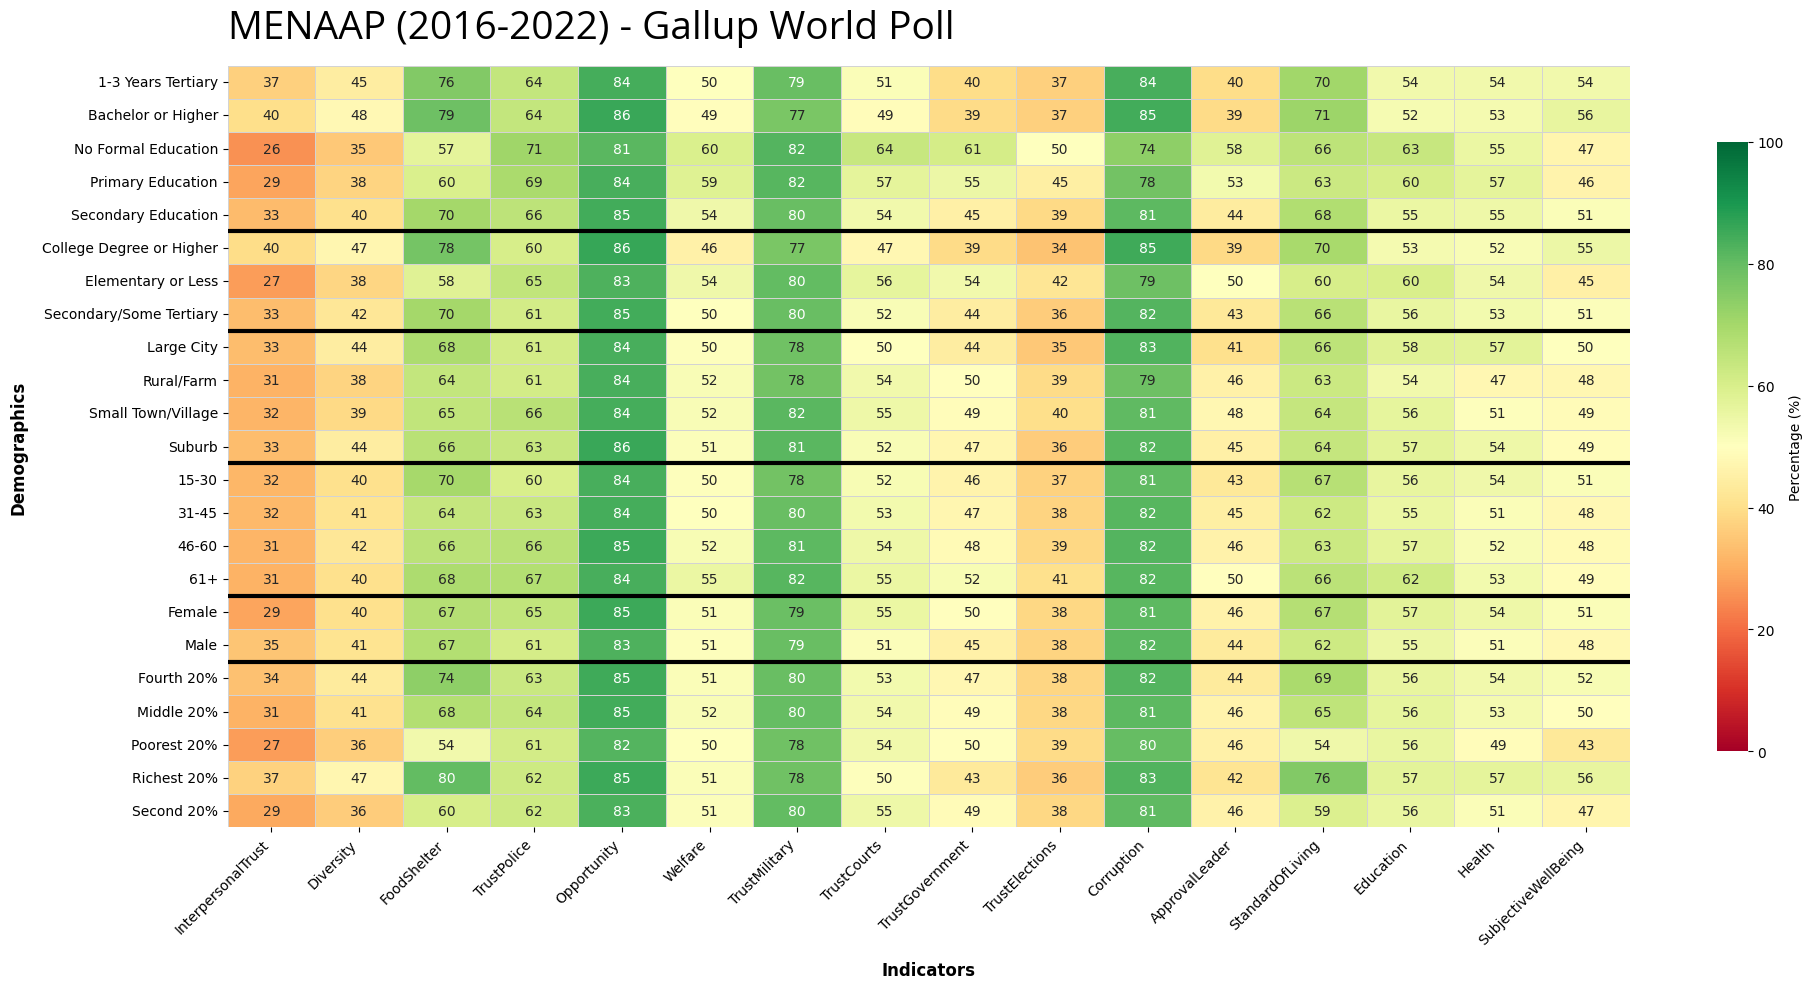

In [21]:

fig2, ax2 = plot_demographic_heatmap(
    heatmap_df=menaap_2016_2022,
    separator_positions=separator_positions,
    figsize=(20, 10),
    title=f'MENAAP (2016-2022) - Gallup World Poll',
    add_separators=True
)
plt.show()

# fig2, ax2 = plot_demographic_heatmap(
#     heatmap_df=menaap_2016_2020,
#     separator_positions=separator_positions,
#     figsize=(20, 10),
#     title=f'MENAAP (2016-2020) - Gallup World Poll',
#     add_separators=True
# )
# plt.show()


# # Step 2: Create visualization
# fig2, ax2 = plot_demographic_heatmap(
#     heatmap_df=menaap_2021_2022,
#     separator_positions=separator_positions,
#     figsize=(20, 10),
#     title=f'MENAAP (2021-2022) - Gallup World Poll',
#     add_separators=True
# )
# plt.show()


## GenZ (15-30) Breakdown of Poll Statistics for MENAAP

In [22]:
genz_columns = ['Education_Level_Label',
 'Education_Level_Label_3Cat',
 'Residence_Label',
 'Gender_Label',
 'Income_Label']

In [23]:
genZ_2016_2020, _ = aggregate_demographic_means(
    gallup[(gallup['Age_Group_Label']=='15-30') & (gallup['YEAR_WAVE'].between(2016, 2020))],
    genz_columns, columns_of_interest, 'wgt', True
)

genZ_2016_2022, _ = aggregate_demographic_means(
    gallup[(gallup['Age_Group_Label']=='15-30') & (gallup['YEAR_WAVE'].between(2016, 2022))],
    genz_columns, columns_of_interest, 'wgt', True
)

genZ_2021_2022, _ = aggregate_demographic_means(
    gallup[(gallup['Age_Group_Label']=='15-30') & (gallup['YEAR_WAVE'].between(2021, 2022))],
    genz_columns, columns_of_interest, 'wgt', True
)

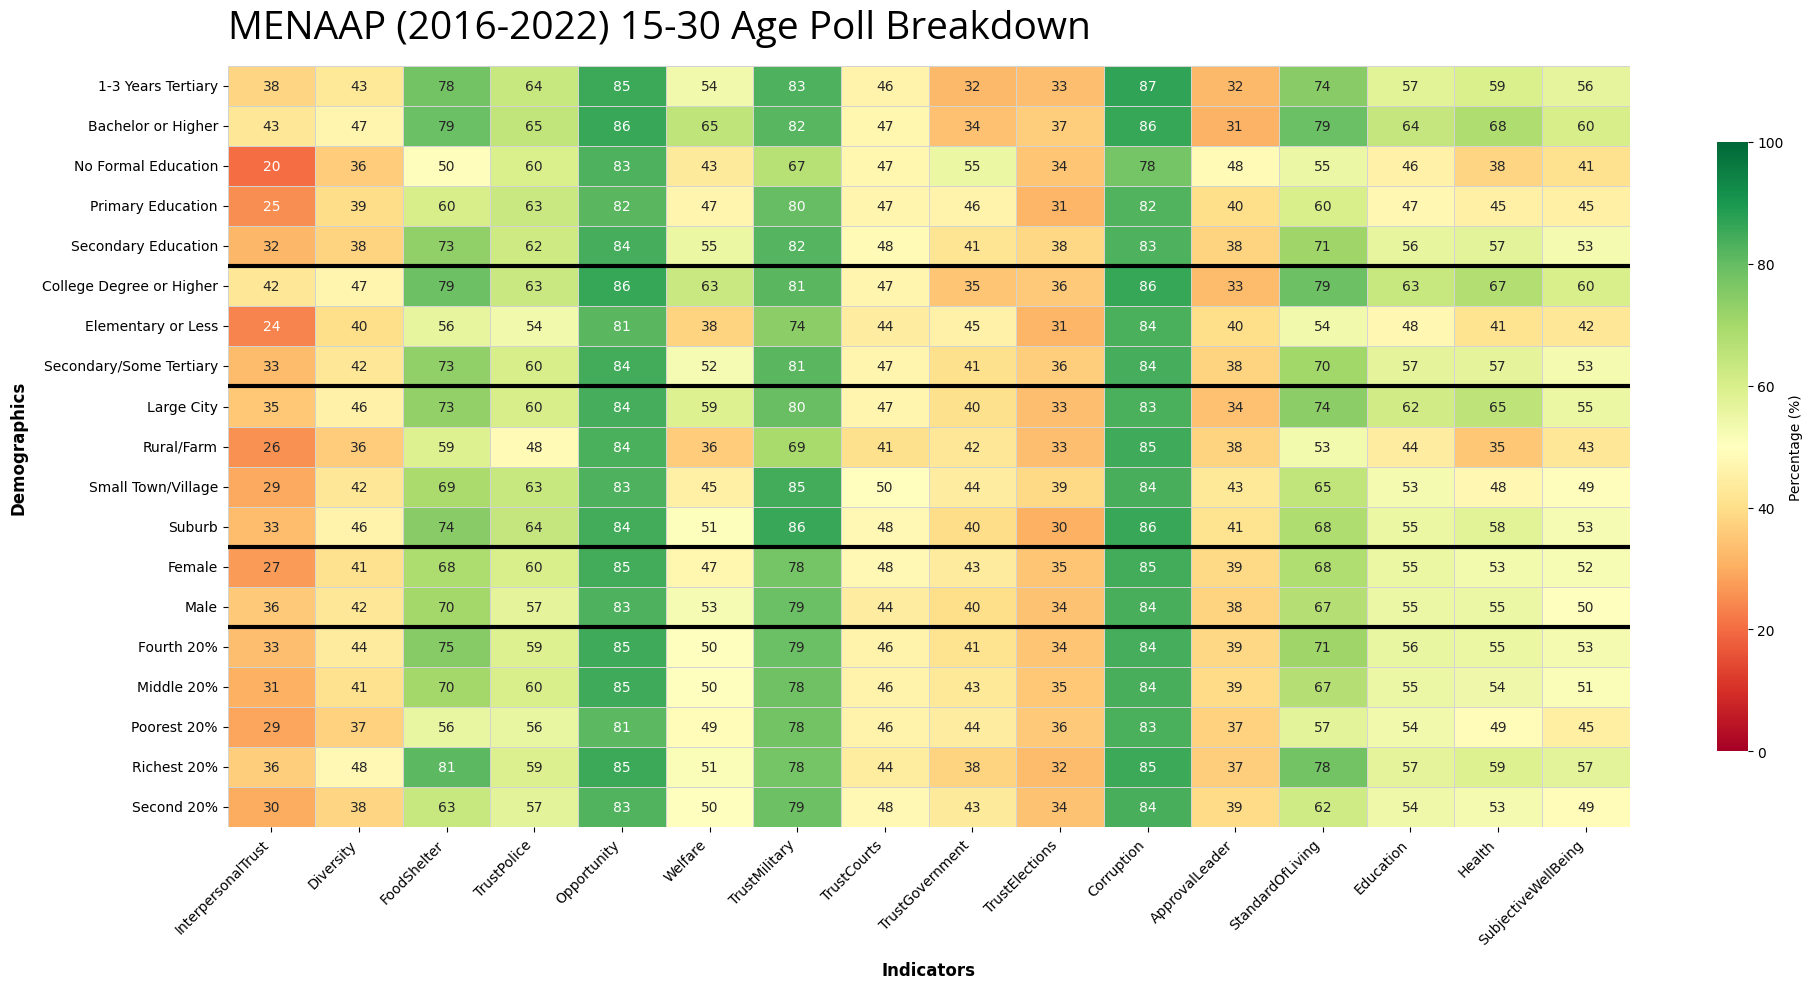

In [24]:
fig2, ax2 = plot_demographic_heatmap(
    heatmap_df=genZ_2016_2022,
    separator_positions=_,
    figsize=(20, 10),
    title=f'MENAAP (2016-2022) 15-30 Age Poll Breakdown',
    add_separators=True
)
plt.show()

# fig2, ax2 = plot_demographic_heatmap(
#     heatmap_df=genZ_2016_2020,
#     separator_positions=_,
#     figsize=(20, 10),
#     title=f'MENAAP (2016-2020) 15-30 Age Poll Breakdown',
#     add_separators=True
# )
# plt.show()

# fig2, ax2 = plot_demographic_heatmap(
#     heatmap_df=genZ_2021_2022,
#     separator_positions=_,
#     figsize=(20, 10),
#     title=f'MENAAP (2021-2022) 15-30 Age Poll Breakdown',
#     add_separators=True
# )
# plt.show()

Among GenZ population 
- there is low trust in elections, low approval ratings, welfare and low interpersonal trust. 
- Young people in rural areas are not satisfied with efforts to deal with the poor (welfare), 
- civic engagement is low (interpersonal trust)

## GenZ (15-30) Breakdown of Poll Statistics for Morocco

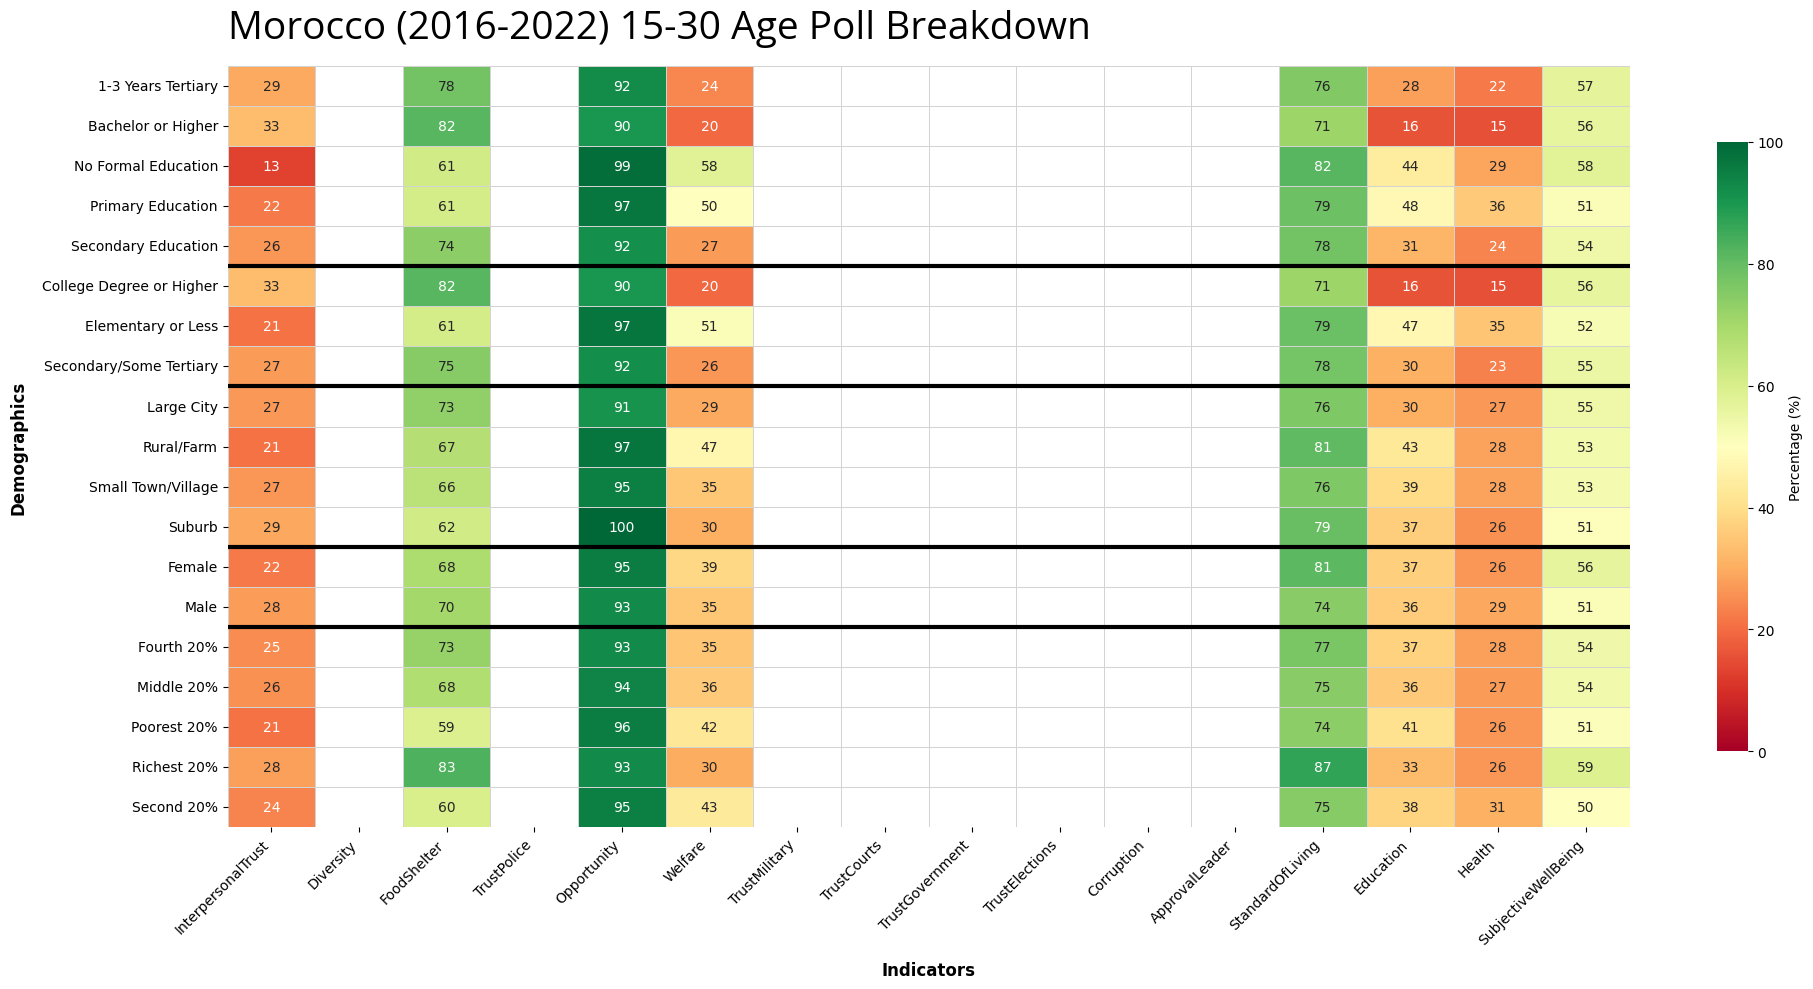

In [26]:
genZ_morocco_2016_2020, _ = aggregate_demographic_means(
    gallup[(gallup['countrynew']=='Morocco')&(gallup['Age_Group_Label']=='15-30') & (gallup['YEAR_WAVE'].between(2016, 2020))],
    genz_columns, columns_of_interest, 'wgt', True
)

genZ_morocco_2016_2022, _ = aggregate_demographic_means(
    gallup[(gallup['countrynew']=='Morocco')&(gallup['Age_Group_Label']=='15-30') & (gallup['YEAR_WAVE'].between(2016, 2022))],
    genz_columns, columns_of_interest, 'wgt', True
)

genZ_morocco_2021_2022, _ = aggregate_demographic_means(
    gallup[(gallup['countrynew']=='Morocco')&(gallup['Age_Group_Label']=='15-30') & (gallup['YEAR_WAVE'].between(2021, 2022))],
    genz_columns, columns_of_interest, 'wgt', True
)

fig2, ax2 = plot_demographic_heatmap(
    heatmap_df=genZ_morocco_2016_2022,
    separator_positions=_,
    figsize=(20, 10),
    title=f'Morocco (2016-2022) 15-30 Age Poll Breakdown',
    add_separators=True
)
plt.show()

# fig2, ax2 = plot_demographic_heatmap(
#     heatmap_df=genZ_morocco_2016_2020,
#     separator_positions=_,
#     figsize=(20, 10),
#     title=f'Morocco (2016-2020) 15-30 Age Poll Breakdown',
#     add_separators=True
# )
# plt.show()

# fig2, ax2 = plot_demographic_heatmap(
#     heatmap_df=genZ_morocco_2021_2022,
#     separator_positions=_,
#     figsize=(20, 10),
#     title=f'Morocco (2021-2022) 15-30 Age Poll Breakdown',
#     add_separators=True
# )
# plt.show()

## Change in Trends from 2016-2020 to 2021-2022

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


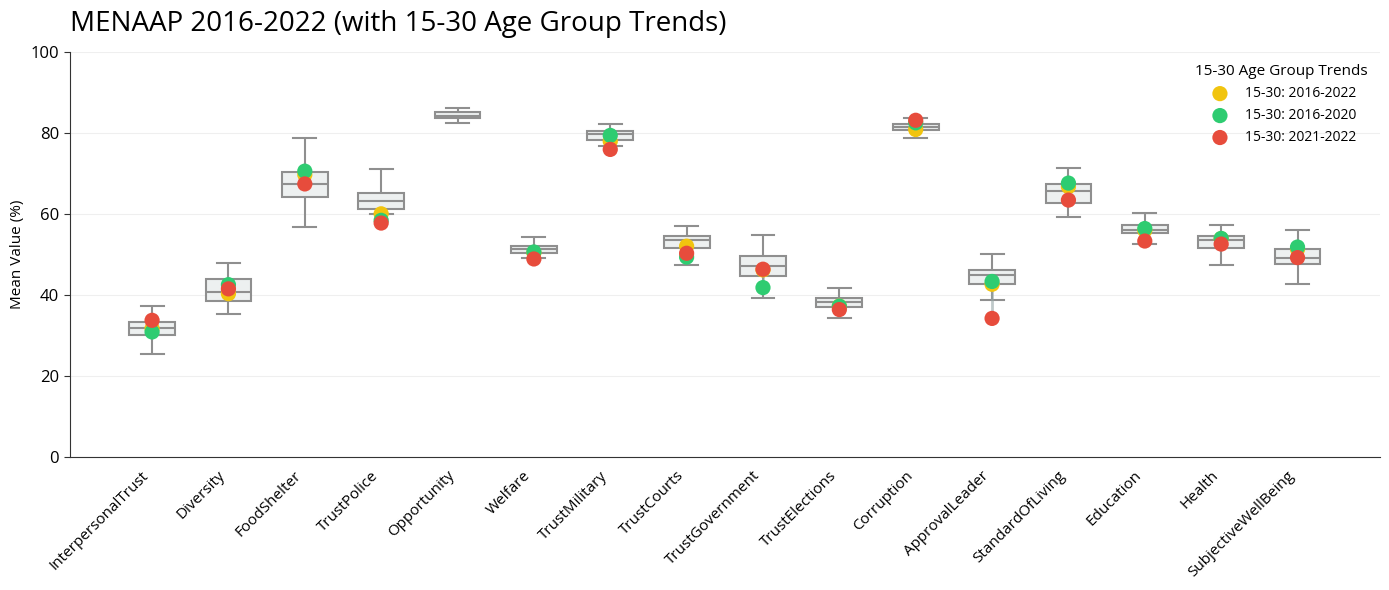

In [ ]:
# Auto-reload modules when they change
%load_ext autoreload
%autoreload 2

from visuals import *

# Plot for MENAAP region
fig, ax = plot_age_group_trends(
    menaap_2016_2020=menaap_2016_2020,
    menaap_2021_2022=menaap_2021_2022,
    menaap_2016_2022=menaap_2016_2022,
    indicator_cols=columns_of_interest,
    title='MENAAP 2016-2022 (with 15-30 Age Group Trends)',
    figsize=(14, 6),
    point_size=7
)
plt.show()

# Now create plots for each country in the dataset
# print("\nGenerating plots for all countries...")
# print("="*60)



## Country level Breakdown of Trends

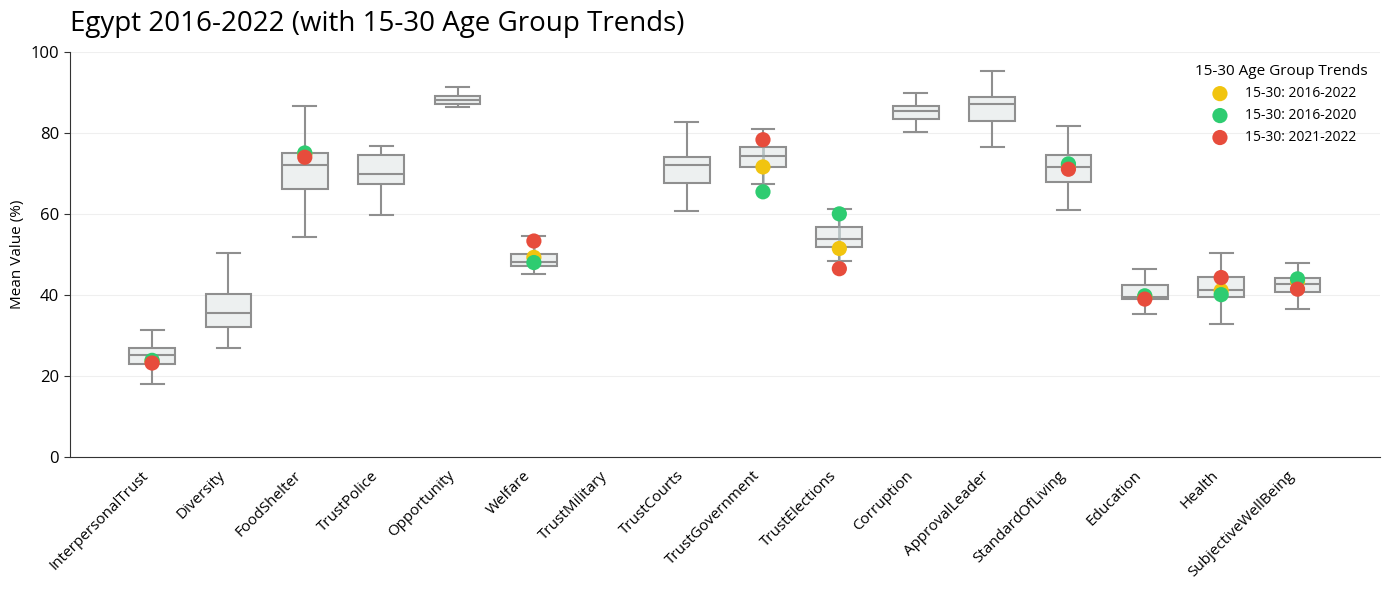

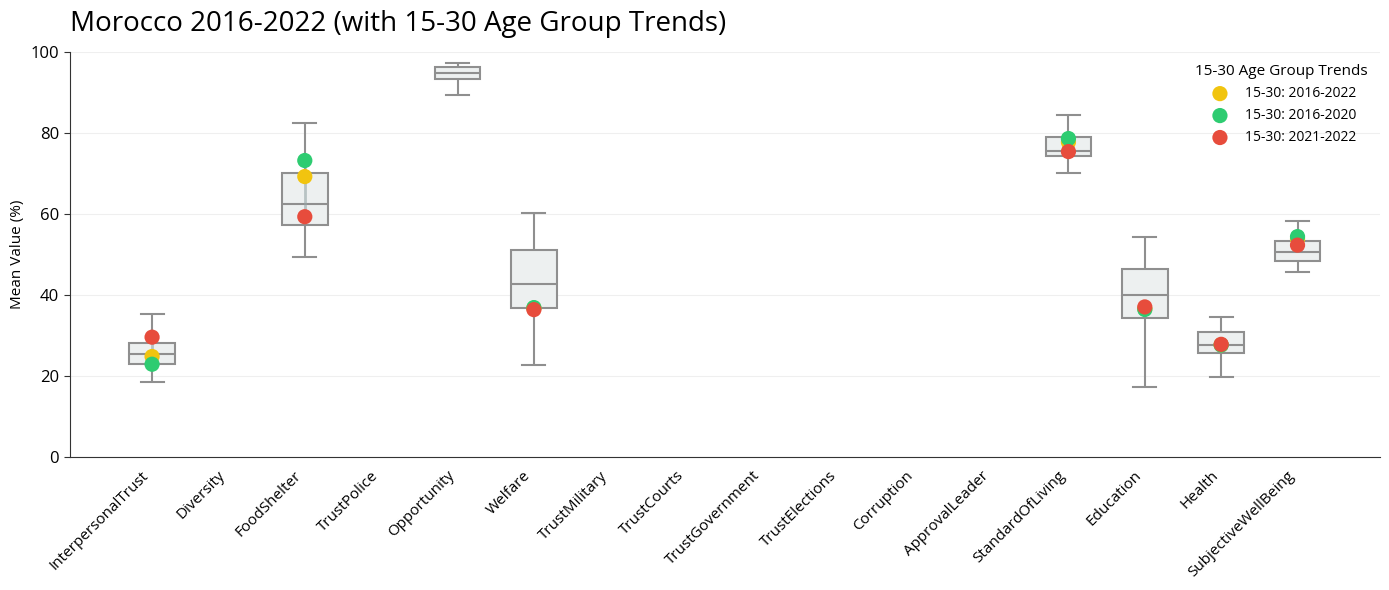

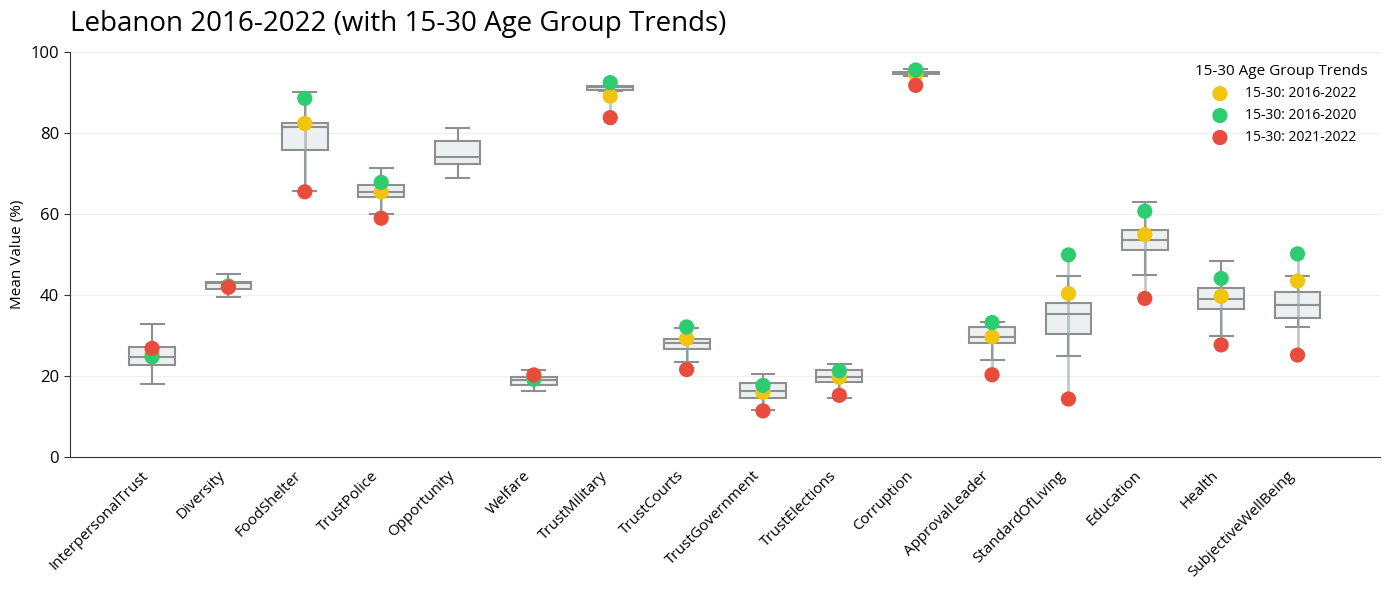

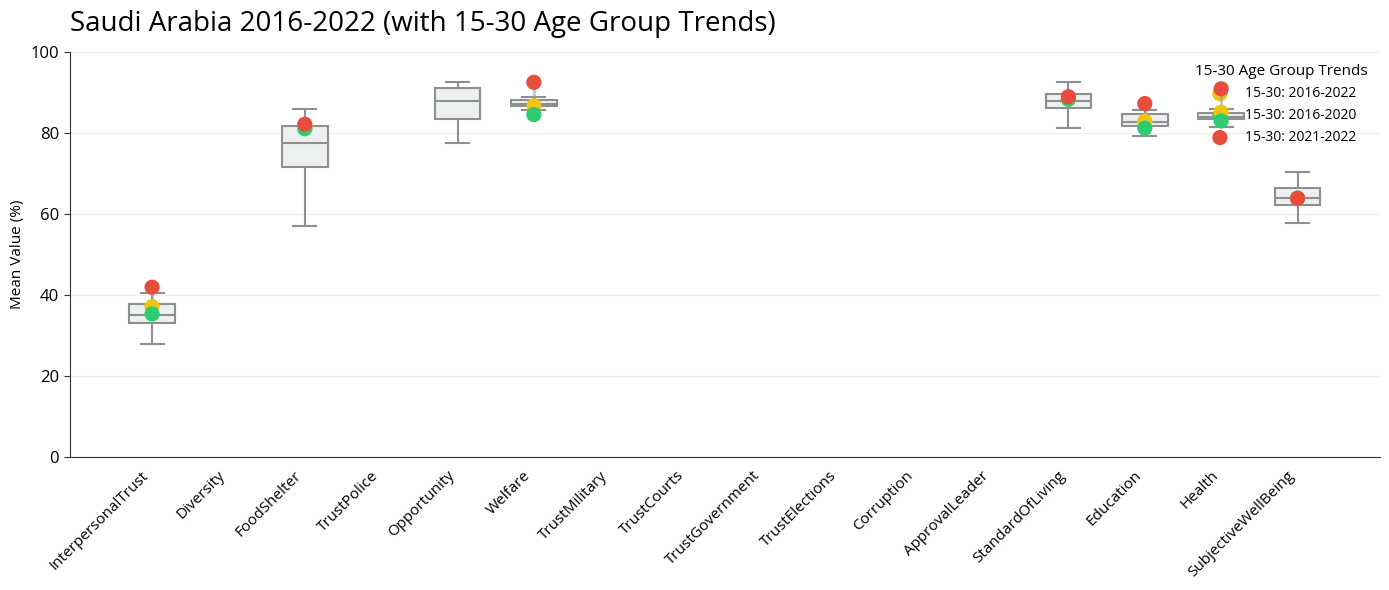

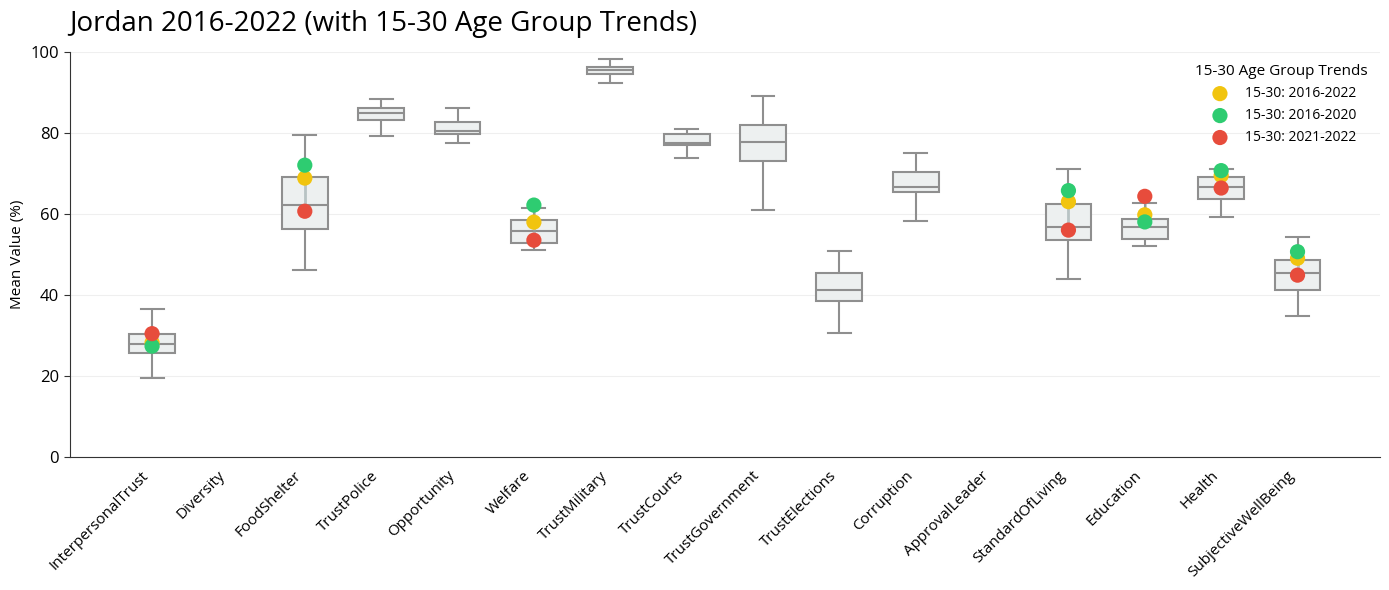

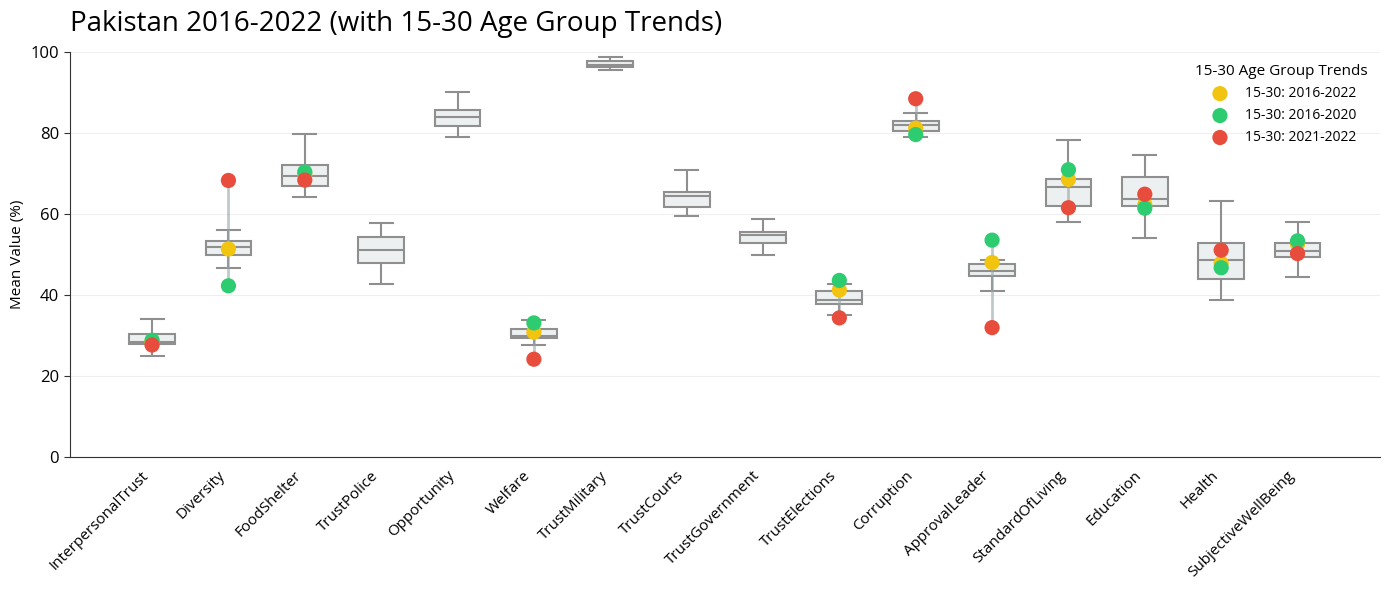

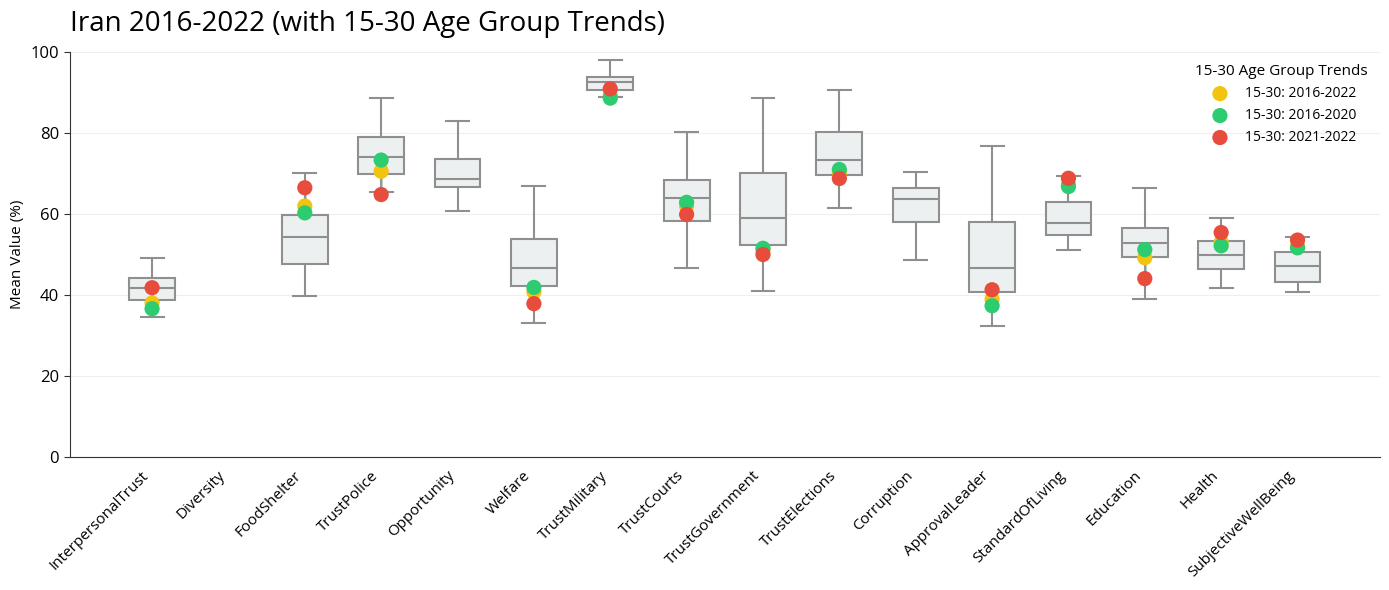

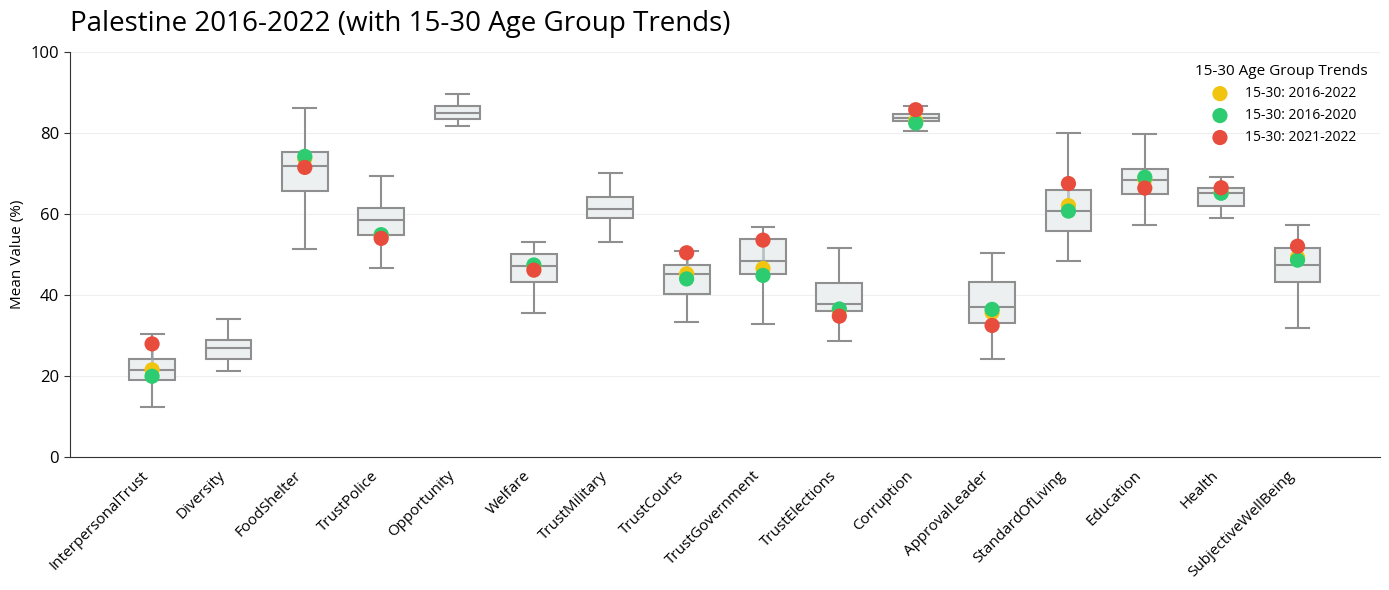

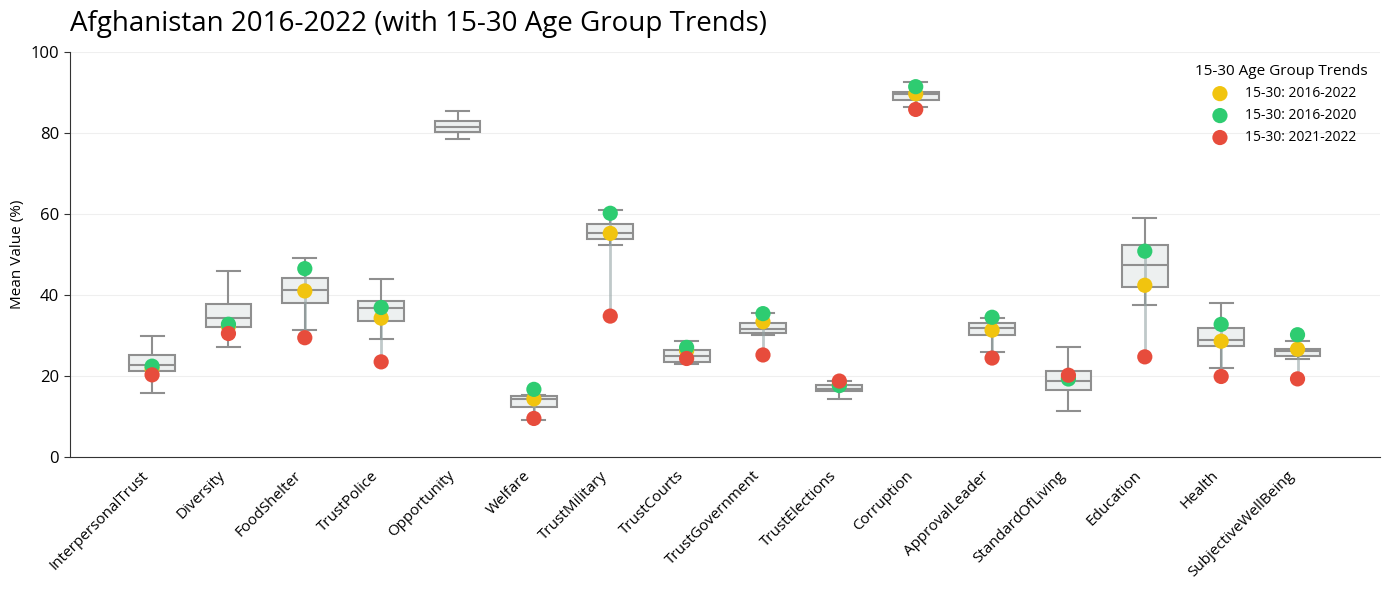

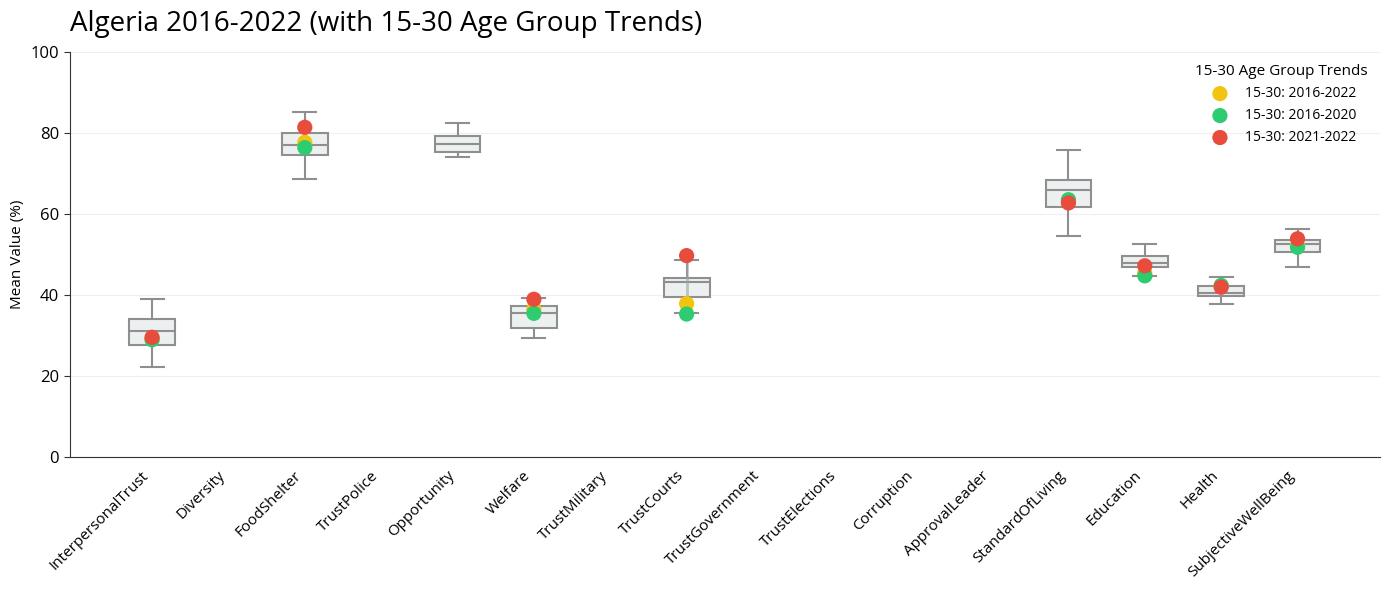

  ⚠️ Insufficient data for Bahrain


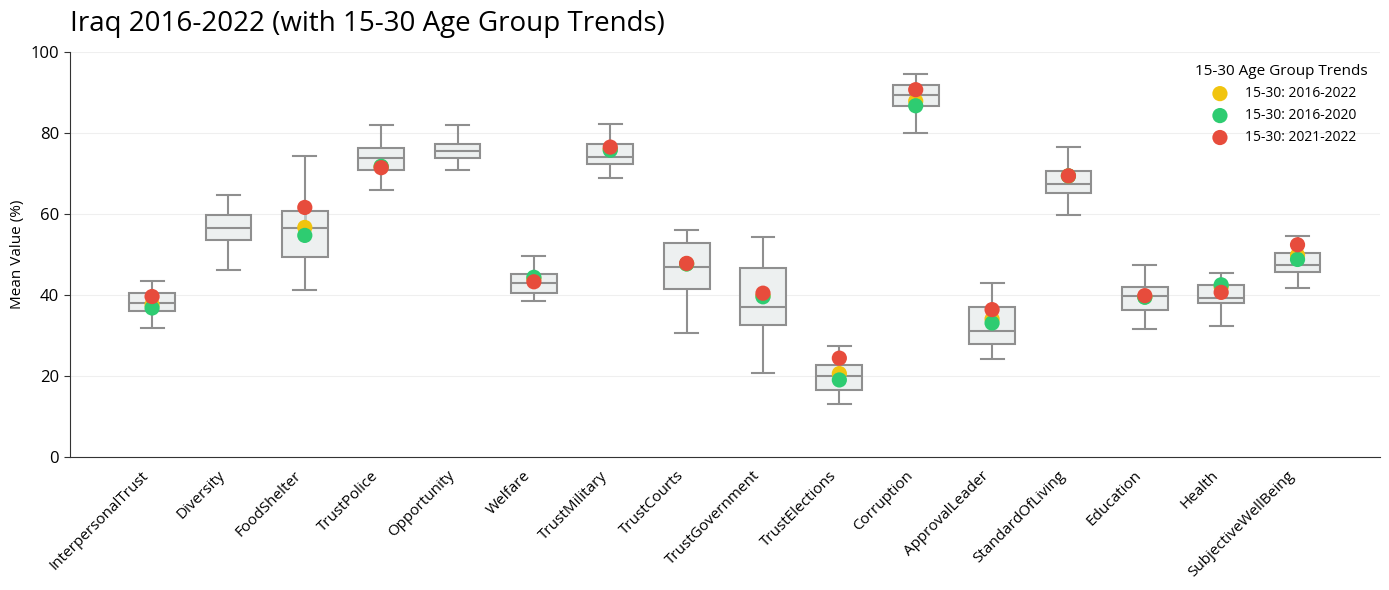

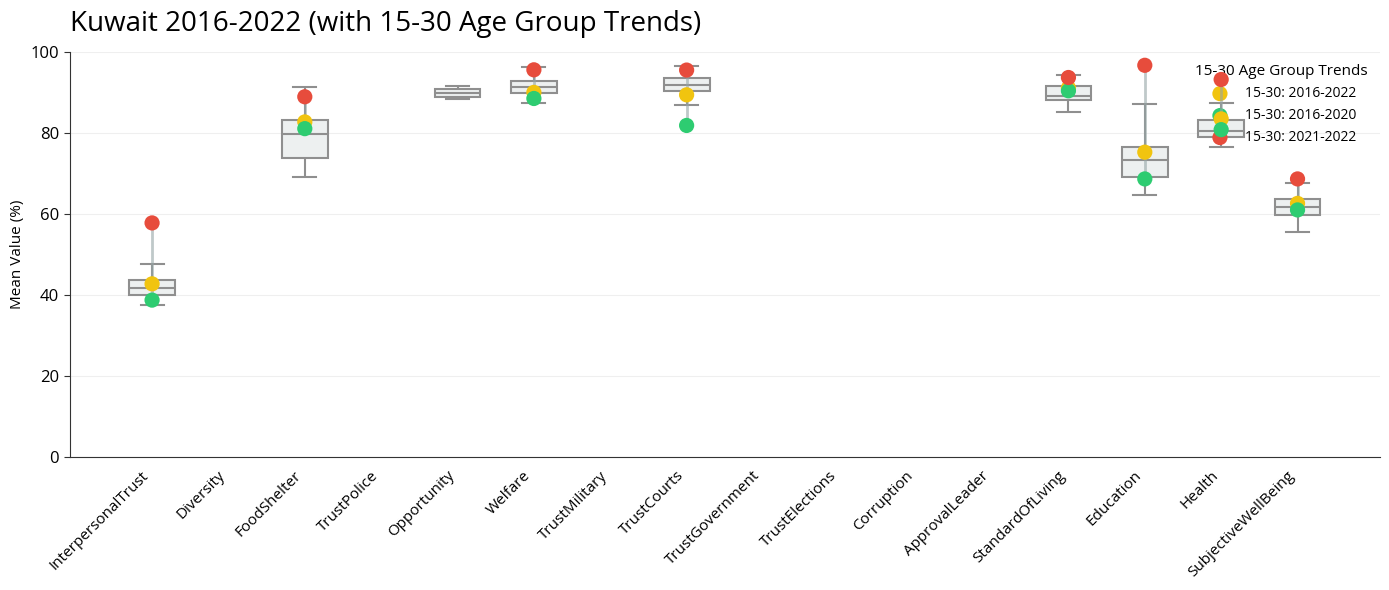

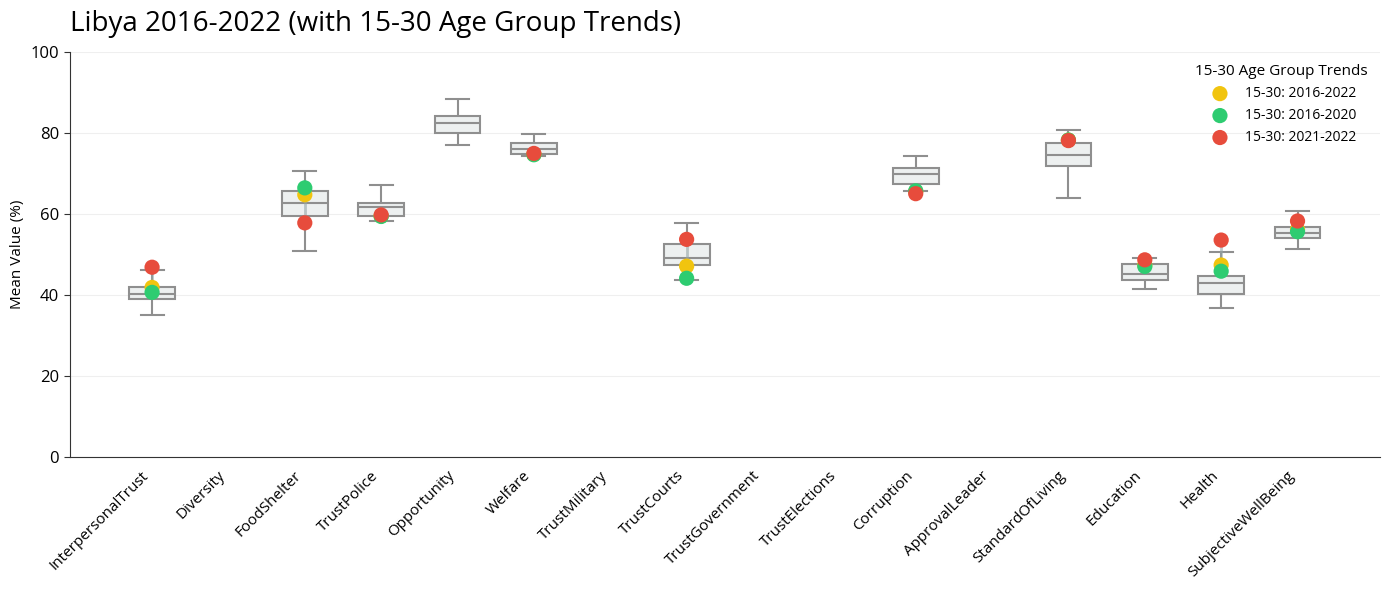

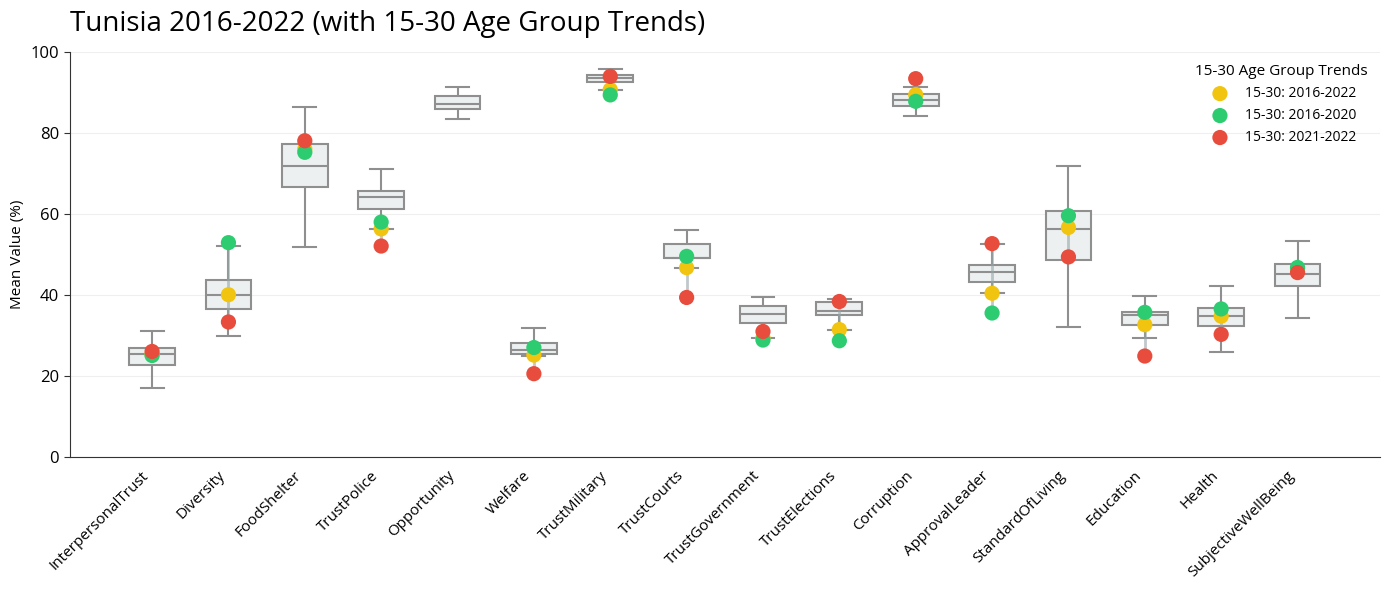

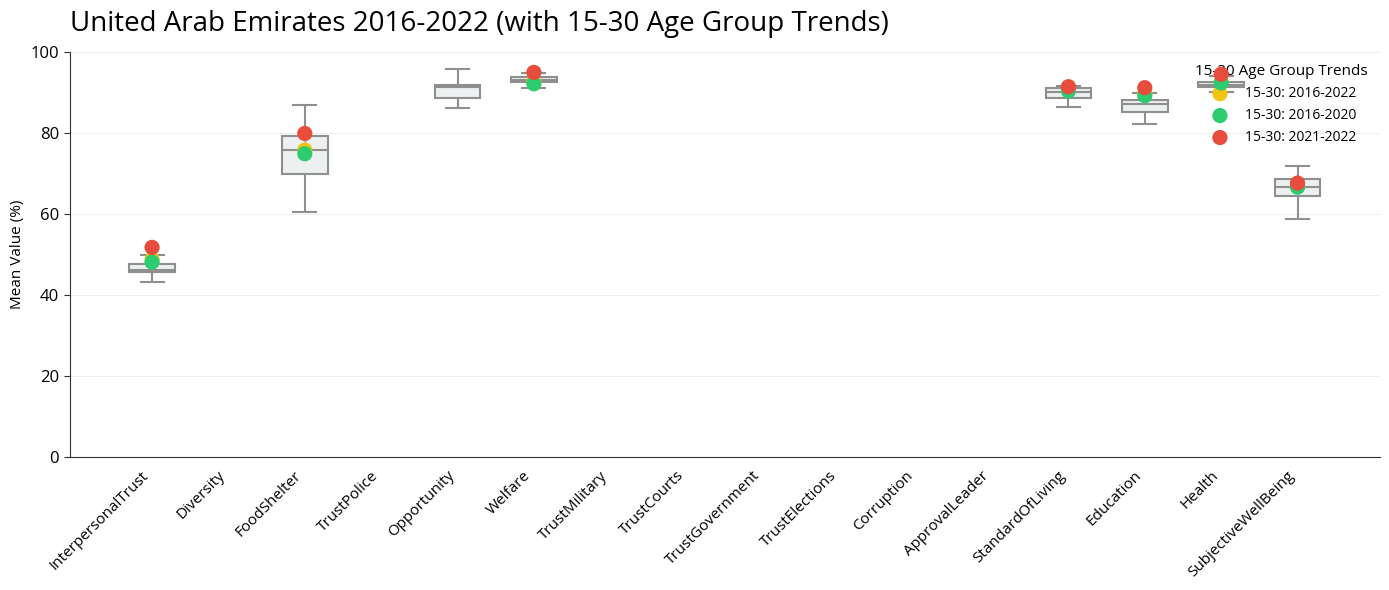

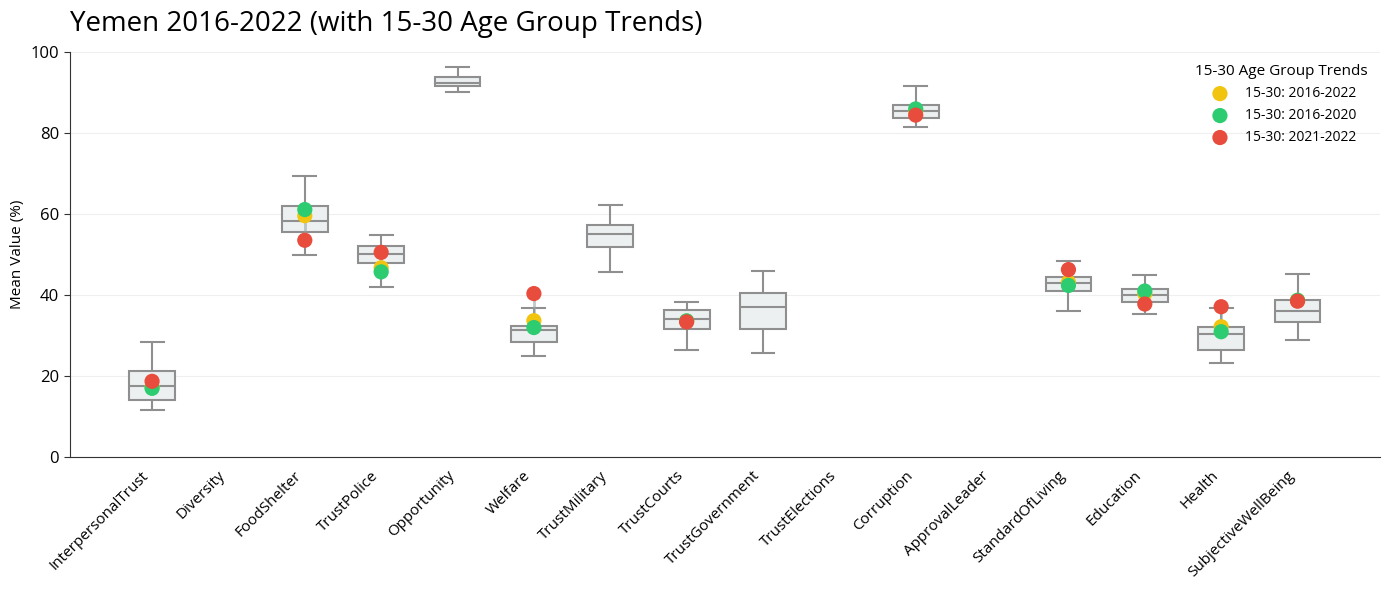

In [ ]:

for country_name in gallup['countrynew'].unique():
    #print(f"Processing: {country_name}")
    
    # Create country-specific datasets for different time periods
    country_2016_2020, _ = aggregate_demographic_means(
        gallup[(gallup['countrynew']==country_name) & (gallup['YEAR_WAVE'].between(2016, 2020))],
        demographics_of_interest, columns_of_interest, 'wgt', True
    )
    
    country_2021_2022, _ = aggregate_demographic_means(
        gallup[(gallup['countrynew']==country_name) & (gallup['YEAR_WAVE'].between(2021, 2022))],
        demographics_of_interest, columns_of_interest, 'wgt', True
    )
    
    country_2016_2022, _ = aggregate_demographic_means(
        gallup[(gallup['countrynew']==country_name) & (gallup['YEAR_WAVE'].between(2016, 2022))],
        demographics_of_interest, columns_of_interest, 'wgt', True
    )
    
    # Check if we have data for all periods
    if len(country_2016_2020) > 0 and len(country_2021_2022) > 0 and len(country_2016_2022) > 0:
        fig, ax = plot_age_group_trends(
            menaap_2016_2020=country_2016_2020,
            menaap_2021_2022=country_2021_2022,
            menaap_2016_2022=country_2016_2022,
            indicator_cols=columns_of_interest,
            title=f'{country_name} 2016-2022 (with 15-30 Age Group Trends)',
            figsize=(14, 6),
            point_size=7
        )
        plt.show()
    else:
        print(f"  ⚠️ Insufficient data for {country_name}")